In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wego = pd.read_csv("../data/headway_data.csv")

wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


In [4]:
wego.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350329 entries, 0 to 350328
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CALENDAR_ID                350329 non-null  int64  
 1   SERVICE_ABBR               350329 non-null  int64  
 2   ADHERENCE_ID               350329 non-null  int64  
 3   DATE                       350329 non-null  object 
 4   ROUTE_ABBR                 350329 non-null  int64  
 5   BLOCK_ABBR                 350329 non-null  int64  
 6   OPERATOR                   350329 non-null  int64  
 7   TRIP_ID                    350329 non-null  int64  
 8   OVERLOAD_ID                350329 non-null  int64  
 9   ROUTE_DIRECTION_NAME       350329 non-null  object 
 10  TIME_POINT_ABBR            350329 non-null  object 
 11  ROUTE_STOP_SEQUENCE        350318 non-null  float64
 12  TRIP_EDGE                  350329 non-null  int64  
 13  LATITUDE                   35

# Q1

In [53]:
adjusted_counts = wego[['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT']].value_counts().reset_index()

In [60]:
adjusted_counts

,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,count
0,0,0,1,270048
1,0,1,0,59038
2,0,0,0,11468
3,1,0,0,9775


In [ ]:
# # Jessica's alternate
# # Percent of on-time stops - using only tagged rows
# round((wego['ADJUSTED_ONTIME_COUNT'].sum()) / (wego['ADJUSTED_ONTIME_COUNT'].sum() 
#                                                + wego['ADJUSTED_EARLY_COUNT'].sum() 
#                                                + wego['ADJUSTED_LATE_COUNT'].sum()) * 100, 2)

In [79]:
# What percentage of trips were on time? We removed trips that had zeros in all adjusted columns.

str(round(((adjusted_counts['count'].iloc[0])/
(adjusted_counts['count'].iloc[0]+adjusted_counts['count'].iloc[1]+adjusted_counts['count'].iloc[3]))*100,2))+'% of trips were on time.'

'79.69% of trips were on time.'

In [15]:
wego.agg({'ADHERENCE': ['min','max','mean']})

,ADHERENCE
min,-948.533333
max,88.383333
mean,-3.188796


In [16]:
wego.agg({'HDWY_DEV': ['min','max','mean']})

,HDWY_DEV
min,-64.000000
max,565.433333
mean,0.518081


In [35]:
#investigating some of the outliers
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
wego.nsmallest(10,'HDWY_DEV')

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
189594,120230902,2,100390762,2023-09-02,52,5210,2580,352146,0,FROM DOWNTOWN,LINWAL,10.0,0,36.083421,-86.703471,2023-09-02 16:04:00,2023-09-02 16:48:29,2023-09-02 16:48:29,-44.483333,41.0,0.216666,-40.783334,0,1,0,0,0.0,0,0.00,NaN
108927,120230819,2,99991418,2023-08-19,52,5211,2706,352198,0,FROM DOWNTOWN,LINWAL,10.0,0,36.083421,-86.703471,2023-08-19 21:27:00,2023-08-19 21:32:48,2023-08-19 21:32:48,-5.800000,50.0,8.716666,-41.283334,0,0,1,0,0.0,0,0.00,NaN
308153,120230923,2,100195057,2023-09-23,52,5211,2706,352200,0,FROM DOWNTOWN,DCSCC,11.0,0,36.086817,-86.686874,2023-09-23 23:34:00,2023-09-25 00:39:47,2023-09-24 00:39:47,-65.783333,60.0,18.200000,-41.800000,0,1,0,0,0.0,0,0.00,NaN
170961,120230830,1,100294482,2023-08-30,52,5201,1880,352011,1,TO DOWNTOWN,HCKP,9.0,1,36.048934,-86.713854,2023-08-30 19:45:00,2023-08-30 19:27:30,2023-08-30 19:46:12,-1.200000,43.0,0.316666,-42.683334,0,0,1,0,1.0,0,18.70,21.0
299319,120230922,1,100145220,2023-09-22,22,2200,2374,349957,0,FROM DOWNTOWN,ELIZ,10.0,0,36.195013,-86.837902,2023-09-22 16:44:00,2023-09-22 16:46:26,2023-09-22 16:46:26,-2.433333,50.0,6.350000,-43.650000,0,0,1,0,0.0,0,0.00,NaN
227443,120230909,2,100580879,2023-09-09,52,5212,3101,352234,0,FROM DOWNTOWN,DCSCC,11.0,0,36.086817,-86.686874,2023-09-09 22:34:00,2023-09-09 23:44:38,2023-09-09 23:46:35,-72.583333,62.0,12.333333,-49.666667,0,1,0,1,0.0,0,1.95,NaN
227442,120230909,2,100580878,2023-09-09,52,5212,3101,352234,0,FROM DOWNTOWN,LINWAL,10.0,0,36.083421,-86.703471,2023-09-09 22:29:00,2023-09-09 23:41:04,2023-09-09 23:41:04,-72.066666,62.0,11.683333,-50.316667,0,1,0,1,0.0,0,0.00,NaN
108940,120230819,2,99991431,2023-08-19,52,5211,2706,352200,0,FROM DOWNTOWN,LINWAL,10.0,0,36.083421,-86.703471,2023-08-19 23:29:00,2023-08-19 23:46:47,2023-08-19 23:46:47,-17.783333,60.0,6.833333,-53.166667,0,1,0,0,0.0,0,0.00,NaN
108941,120230819,2,99991432,2023-08-19,52,5211,2706,352200,0,FROM DOWNTOWN,DCSCC,11.0,0,36.086817,-86.686874,2023-08-19 23:34:00,2023-08-19 23:50:43,2023-08-19 23:50:43,-16.716666,60.0,4.466666,-55.533334,0,1,0,0,0.0,0,0.00,NaN
30822,120230806,3,99602763,2023-08-06,3,300,2352,350965,0,TO DOWNTOWN,WHBG,6.0,1,36.149179,-86.858044,2023-08-06 21:42:00,2023-08-06 22:43:02,2023-08-06 22:43:02,-61.033333,64.0,0.000000,-64.000000,0,1,0,0,0.0,0,0.00,1.0


<Axes: ylabel='HDWY_DEV'>

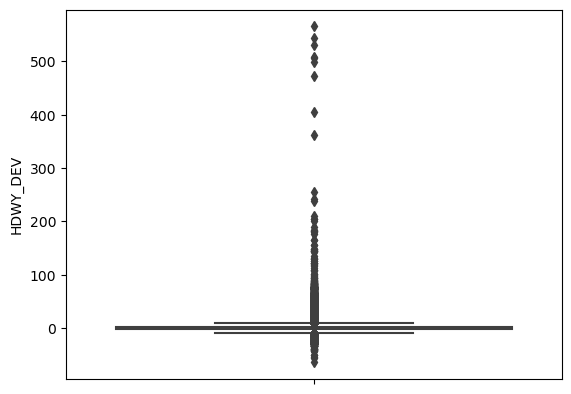

In [37]:
sns.boxplot( y=wego['HDWY_DEV'])

<Axes: ylabel='ADHERENCE'>

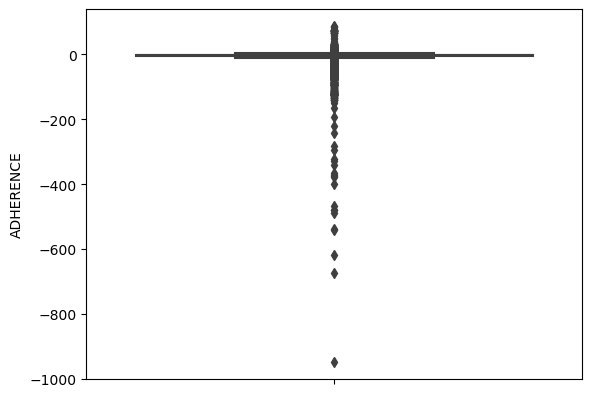

In [38]:
sns.boxplot( y=wego['ADHERENCE'])

# Q2

In [80]:
wego['ROUTE_DIRECTION_NAME'].value_counts()

ROUTE_DIRECTION_NAME
FROM DOWNTOWN    185793
TO DOWNTOWN      164536
Name: count, dtype: int64

In [94]:
wego.groupby(by='ROUTE_DIRECTION_NAME').agg({'HDWY_DEV': ['min','max','mean']})

HDWY_DEV                      
                            min         max      mean
ROUTE_DIRECTION_NAME                                 
FROM DOWNTOWN        -55.533334  565.433333  0.579990
TO DOWNTOWN          -64.000000  543.833333  0.447773

In [96]:
wego.groupby(by='ROUTE_DIRECTION_NAME').agg({'ADHERENCE': ['min','max','mean']})

ADHERENCE                     
                             min        max      mean
ROUTE_DIRECTION_NAME                                 
FROM DOWNTOWN        -948.533333  76.766666 -3.960287
TO DOWNTOWN          -618.166666  88.383333 -2.321804